In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [177]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load data

In [178]:
# data set from https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

In [179]:
df = pd.read_csv("bank_transactions.csv")

In [180]:
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


# 2. Check data quarity

In [181]:
# check data type

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [183]:
# check na

In [184]:
df.shape

(1048567, 9)

In [185]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [186]:
# check unique value

In [187]:
for i in df.columns:
    print('Columns name: ', i)
    print('Unique value: ', df[i].unique())
    print('Count unique value: ', df[i].nunique())
    print('-'*10)

Columns name:  TransactionID
Unique value:  ['T1' 'T2' 'T3' ... 'T1048565' 'T1048566' 'T1048567']
Count unique value:  1048567
----------
Columns name:  CustomerID
Unique value:  ['C5841053' 'C2142763' 'C4417068' ... 'C8020229' 'C6459278' 'C6420483']
Count unique value:  884265
----------
Columns name:  CustomerDOB
Unique value:  ['10/1/94' '4/4/57' '26/11/96' ... '18/7/65' '15/5/42' '24/10/44']
Count unique value:  17254
----------
Columns name:  CustGender
Unique value:  ['F' 'M' nan 'T']
Count unique value:  3
----------
Columns name:  CustLocation
Unique value:  ['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' ... 'KARANJIA'
 'NR HERITAGE FRESH HYDERABAD' 'IMPERIA THANE WEST']
Count unique value:  9355
----------
Columns name:  CustAccountBalance
Unique value:  [ 17819.05   2270.69  17874.44 ... 182889.37  15037.89   1002.96]
Count unique value:  161328
----------
Columns name:  TransactionDate
Unique value:  ['2/8/16' '1/8/16' '3/8/16' '5/8/16' '4/8/16' '6/8/16' '9/8/16' '8/8/16'
 '12/8/16' '7/8/

In [188]:
# date format will be a problem in our analysis

# 3. Data transformation

In [189]:
# Age
# Sex
# Urban/Suburban
# Average Transaction Time
# Average Ticket Size
# Average Balance
# Number of Transactions

In [190]:
# missing value

In [191]:
df.dropna(inplace=True)

In [192]:
# customer ID

In [193]:
distinct_customers = df['CustomerID'].unique()
distinct_customers_df = pd.DataFrame({'CustomerID': distinct_customers})

In [194]:
distinct_customers_df

,CustomerID
0,C5841053
1,C2142763
2,C4417068
3,C5342380
4,C9031234
...,...
879353,C5028150
879354,C1034220
879355,C8020229
879356,C6459278


In [195]:
# age

In [196]:
df[['day', 'month', 'year']] = df['CustomerDOB'].str.split('/', expand=True)

In [197]:
df['year'] = df['year'].astype(int)

In [198]:
print(df['year'].min(), df['year'].max())

0 1800


In [199]:
df_for_age = df[df['year'] <= 99]

In [200]:
df_for_age['age'] = 2016 - (1900+df_for_age['year'])

C:\Users\peerapat\AppData\Local\Temp/ipykernel_12464/3355448113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_age['age'] = 2016 - (1900+df_for_age['year'])


In [201]:
customers_age_df = df_for_age.groupby('CustomerID')['age'].max().reset_index()
customers_age_df.columns = ['CustomerID', 'age']

In [202]:
customers_age_df

,CustomerID,age
0,C1010011,33
1,C1010012,22
2,C1010014,32
3,C1010018,26
4,C1010024,51
...,...,...
839076,C9099836,26
839077,C9099877,20
839078,C9099919,23
839079,C9099941,21


In [203]:
# sex

In [204]:
df['CustGender'] = df['CustGender'].apply(lambda x: 1 if x == 'M' else 0)

In [205]:
customers_sex_df = df.groupby('CustomerID')['CustGender'].max().reset_index()
customers_sex_df.columns = ['CustomerID', 'sex']

In [206]:
customers_sex_df

,CustomerID,sex
0,C1010011,1
1,C1010012,1
2,C1010014,1
3,C1010018,0
4,C1010024,1
...,...,...
879353,C9099836,1
879354,C9099877,1
879355,C9099919,1
879356,C9099941,1


In [207]:
# city name

In [208]:
# top 10 most populous cities in India:

# Mumbai, Maharashtra
# Delhi, Delhi (NCT)
# Bangalore, Karnataka
# Hyderabad, Telangana
# Ahmedabad, Gujarat
# Chennai, Tamil Nadu
# Kolkata, West Bengal
# Surat, Gujarat
# Pune, Maharashtra
# Jaipur, Rajasthan

In [209]:
big_cities_india = ['MUMBAI', 'DELHI', 'BANGALORE', 'HYDERABAD', 'AHMEDABAD', 'CHENNAI', 'KOLKATA', 'SURAT', 'PUNE', 'JAIPUR']

In [210]:
def flag_big_city(city):
    if city.upper() in big_cities_india:
        return 1
    else:
        return 0

In [211]:
df['flag_big_city'] = df['CustLocation'].apply(flag_big_city)

In [212]:
customers_big_city_df = df.groupby('CustomerID')['flag_big_city'].max().reset_index()
customers_big_city_df.columns = ['CustomerID', 'big_city']

In [213]:
customers_big_city_df

,CustomerID,big_city
0,C1010011,0
1,C1010012,1
2,C1010014,1
3,C1010018,0
4,C1010024,1
...,...,...
879353,C9099836,0
879354,C9099877,1
879355,C9099919,0
879356,C9099941,1


In [214]:
# txn time

In [215]:
customers_txn_time_df = df.groupby('CustomerID')['TransactionTime'].agg([
    ('min_transaction_time_minute', 'min'),
    ('max_transaction_time_minute', 'max'),
    ('med_transaction_time_minute', np.median),
    ('avg_transaction_time_minute', 'mean')
]).reset_index()

In [216]:
customers_txn_time_df

,CustomerID,min_transaction_time_minute,max_transaction_time_minute,med_transaction_time_minute,avg_transaction_time_minute
0,C1010011,11229,123813,67521.0,67521.0
1,C1010012,204409,204409,204409.0,204409.0
2,C1010014,154451,220305,187378.0,187378.0
3,C1010018,170254,170254,170254.0,170254.0
4,C1010024,141103,141103,141103.0,141103.0
...,...,...,...,...,...
879353,C9099836,5122,5122,5122.0,5122.0
879354,C9099877,120255,120255,120255.0,120255.0
879355,C9099919,122533,122533,122533.0,122533.0
879356,C9099941,213722,213722,213722.0,213722.0


In [217]:
# ticket size

In [218]:
customers_ticket_size_df = df.groupby('CustomerID')['TransactionAmount (INR)'].agg([
    ('min_transaction_amount', 'min'),
    ('max_transaction_amount', 'max'),
    ('med_transaction_amount', np.median),
    ('avg_transaction_amount', 'mean')
]).reset_index()

In [219]:
customers_ticket_size_df

,CustomerID,min_transaction_amount,max_transaction_amount,med_transaction_amount,avg_transaction_amount
0,C1010011,356.0,4750.0,2553.0,2553.0
1,C1010012,1499.0,1499.0,1499.0,1499.0
2,C1010014,250.0,1205.0,727.5,727.5
3,C1010018,30.0,30.0,30.0,30.0
4,C1010024,5000.0,5000.0,5000.0,5000.0
...,...,...,...,...,...
879353,C9099836,691.0,691.0,691.0,691.0
879354,C9099877,222.0,222.0,222.0,222.0
879355,C9099919,126.0,126.0,126.0,126.0
879356,C9099941,50.0,50.0,50.0,50.0


In [220]:
# balance

In [221]:
customers_balance_df = df.groupby('CustomerID')['CustAccountBalance'].agg([
    ('min_balance_amount', 'min'),
    ('max_balance_amount', 'max'),
    ('med_balance_amount', np.median),
    ('avg_balance_amount', 'mean')
]).reset_index()

In [222]:
customers_balance_df

,CustomerID,min_balance_amount,max_balance_amount,med_balance_amount,avg_balance_amount
0,C1010011,32500.73,120180.54,76340.635,76340.635
1,C1010012,24204.49,24204.49,24204.490,24204.490
2,C1010014,38377.14,161848.76,100112.950,100112.950
3,C1010018,496.18,496.18,496.180,496.180
4,C1010024,87058.65,87058.65,87058.650,87058.650
...,...,...,...,...,...
879353,C9099836,133067.23,133067.23,133067.230,133067.230
879354,C9099877,96063.46,96063.46,96063.460,96063.460
879355,C9099919,5559.75,5559.75,5559.750,5559.750
879356,C9099941,35295.92,35295.92,35295.920,35295.920


In [223]:
# no txn

In [224]:
customers_no_txn_df = df.groupby('CustomerID')['TransactionID'].count().reset_index()
customers_no_txn_df.columns = ['CustomerID', 'no_transaction']

In [225]:
customers_no_txn_df

,CustomerID,no_transaction
0,C1010011,2
1,C1010012,1
2,C1010014,2
3,C1010018,1
4,C1010024,1
...,...,...
879353,C9099836,1
879354,C9099877,1
879355,C9099919,1
879356,C9099941,1


In [226]:
# merge all df

In [227]:
df_transformed = distinct_customers_df
df_transformed = pd.merge(df_transformed, customers_age_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_sex_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_big_city_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_txn_time_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_ticket_size_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_balance_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_no_txn_df, on='CustomerID', how='left')

In [228]:
df_transformed

,CustomerID,age,sex,big_city,min_transaction_time_minute,max_transaction_time_minute,med_transaction_time_minute,avg_transaction_time_minute,min_transaction_amount,max_transaction_amount,med_transaction_amount,avg_transaction_amount,min_balance_amount,max_balance_amount,med_balance_amount,avg_balance_amount,no_transaction
0,C5841053,22.0,0,0,143207,143207,143207.0,143207.0,25.0,25.0,25.0,25.0,17819.05,17819.05,17819.050,17819.050,1
1,C2142763,59.0,1,0,141858,141858,141858.0,141858.0,27999.0,27999.0,27999.0,27999.0,2270.69,2270.69,2270.690,2270.690,1
2,C4417068,20.0,0,1,142712,142712,142712.0,142712.0,459.0,459.0,459.0,459.0,17874.44,17874.44,17874.440,17874.440,1
3,C5342380,43.0,1,1,142714,194148,168431.0,168431.0,878.4,2060.0,1469.2,1469.2,3195.78,866503.21,434849.495,434849.495,2
4,C9031234,28.0,0,0,181156,181156,181156.0,181156.0,1762.5,1762.5,1762.5,1762.5,6714.43,6714.43,6714.430,6714.430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879353,C5028150,36.0,1,1,184632,184632,184632.0,184632.0,3000.0,3000.0,3000.0,3000.0,464.87,464.87,464.870,464.870,1
879354,C1034220,24.0,1,1,184734,184734,184734.0,184734.0,1500.0,1500.0,1500.0,1500.0,1212.70,1212.70,1212.700,1212.700,1
879355,C8020229,26.0,1,0,184824,184824,184824.0,184824.0,799.0,799.0,799.0,799.0,7635.19,7635.19,7635.190,7635.190,1
879356,C6459278,24.0,1,0,183734,183734,183734.0,183734.0,460.0,460.0,460.0,460.0,27311.42,27311.42,27311.420,27311.420,1


In [229]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879358 entries, 0 to 879357
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CustomerID                   879358 non-null  object 
 1   age                          839081 non-null  float64
 2   sex                          879358 non-null  int64  
 3   big_city                     879358 non-null  int64  
 4   min_transaction_time_minute  879358 non-null  int64  
 5   max_transaction_time_minute  879358 non-null  int64  
 6   med_transaction_time_minute  879358 non-null  float64
 7   avg_transaction_time_minute  879358 non-null  float64
 8   min_transaction_amount       879358 non-null  float64
 9   max_transaction_amount       879358 non-null  float64
 10  med_transaction_amount       879358 non-null  float64
 11  avg_transaction_amount       879358 non-null  float64
 12  min_balance_amount           879358 non-null  float64
 13 

In [230]:
# fill age na

In [231]:
mean_age = df_transformed['age'].mean()

In [232]:
df_transformed['age'].fillna(mean_age, inplace=True)

In [233]:
# check data again

In [234]:
df = df_transformed

In [235]:
df.head()

,CustomerID,age,sex,big_city,min_transaction_time_minute,max_transaction_time_minute,med_transaction_time_minute,avg_transaction_time_minute,min_transaction_amount,max_transaction_amount,med_transaction_amount,avg_transaction_amount,min_balance_amount,max_balance_amount,med_balance_amount,avg_balance_amount,no_transaction
0,C5841053,22.0,0,0,143207,143207,143207.0,143207.0,25.0,25.0,25.0,25.0,17819.05,17819.05,17819.050,17819.050,1
1,C2142763,59.0,1,0,141858,141858,141858.0,141858.0,27999.0,27999.0,27999.0,27999.0,2270.69,2270.69,2270.690,2270.690,1
2,C4417068,20.0,0,1,142712,142712,142712.0,142712.0,459.0,459.0,459.0,459.0,17874.44,17874.44,17874.440,17874.440,1
3,C5342380,43.0,1,1,142714,194148,168431.0,168431.0,878.4,2060.0,1469.2,1469.2,3195.78,866503.21,434849.495,434849.495,2
4,C9031234,28.0,0,0,181156,181156,181156.0,181156.0,1762.5,1762.5,1762.5,1762.5,6714.43,6714.43,6714.430,6714.430,1


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879358 entries, 0 to 879357
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CustomerID                   879358 non-null  object 
 1   age                          879358 non-null  float64
 2   sex                          879358 non-null  int64  
 3   big_city                     879358 non-null  int64  
 4   min_transaction_time_minute  879358 non-null  int64  
 5   max_transaction_time_minute  879358 non-null  int64  
 6   med_transaction_time_minute  879358 non-null  float64
 7   avg_transaction_time_minute  879358 non-null  float64
 8   min_transaction_amount       879358 non-null  float64
 9   max_transaction_amount       879358 non-null  float64
 10  med_transaction_amount       879358 non-null  float64
 11  avg_transaction_amount       879358 non-null  float64
 12  min_balance_amount           879358 non-null  float64
 13 

In [237]:
df.columns

Index(['CustomerID', 'age', 'sex', 'big_city', 'min_transaction_time_minute',
       'max_transaction_time_minute', 'med_transaction_time_minute',
       'avg_transaction_time_minute', 'min_transaction_amount',
       'max_transaction_amount', 'med_transaction_amount',
       'avg_transaction_amount', 'min_balance_amount', 'max_balance_amount',
       'med_balance_amount', 'avg_balance_amount', 'no_transaction'],
      dtype='object')

In [238]:
# drop customerID

In [239]:
df.drop('CustomerID', axis=1, inplace=True)

# 4. EDA

In [240]:
# describe

In [241]:
df.describe()

,age,sex,big_city,min_transaction_time_minute,max_transaction_time_minute,med_transaction_time_minute,avg_transaction_time_minute,min_transaction_amount,max_transaction_amount,med_transaction_amount,avg_transaction_amount,min_balance_amount,max_balance_amount,med_balance_amount,avg_balance_amount,no_transaction
count,879358.000000,879358.000000,879358.000000,879358.000000,879358.000000,879358.000000,879358.000000,8.793580e+05,8.793580e+05,8.793580e+05,8.793580e+05,8.793580e+05,8.793580e+05,8.793580e+05,8.793580e+05,879358.000000
mean,31.866631,0.763298,0.405099,152201.781607,161972.733817,157231.843634,157138.661271,1.374494e+03,1.777779e+03,1.549902e+03,1.566794e+03,9.872483e+04,1.324121e+05,1.131702e+05,1.147150e+05,1.184516
std,9.207944,0.425058,0.490911,52290.421915,50071.249065,49147.663839,49070.583002,6.243188e+03,7.107524e+03,6.417066e+03,6.433248e+03,7.638731e+05,9.158626e+05,7.989380e+05,8.010838e+05,0.448954
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,26.000000,1.000000,0.000000,120906.000000,131500.000000,125358.000000,125434.000000,1.301650e+02,2.000000e+02,1.891900e+02,1.908725e+02,3.736700e+03,5.899200e+03,5.507210e+03,5.591270e+03,1.000000
50%,30.000000,1.000000,0.000000,160051.000000,172339.000000,163686.750000,163548.000000,3.750000e+02,5.000000e+02,4.980000e+02,5.000000e+02,1.379172e+04,2.030827e+04,1.828308e+04,1.866578e+04,1.000000
75%,35.000000,1.000000,1.000000,193852.000000,201957.000000,194833.000000,194719.000000,1.000000e+03,1.408408e+03,1.215000e+03,1.241000e+03,4.703967e+04,6.939596e+04,6.006058e+04,6.154196e+04,1.000000
max,116.000000,1.000000,1.000000,235959.000000,235959.000000,235959.000000,235959.000000,1.560035e+06,1.560035e+06,1.560035e+06,1.560035e+06,1.150355e+08,1.150355e+08,1.150355e+08,1.150355e+08,6.000000


In [242]:
# correlation matrix

In [243]:
corr = df.corr()

<AxesSubplot:>

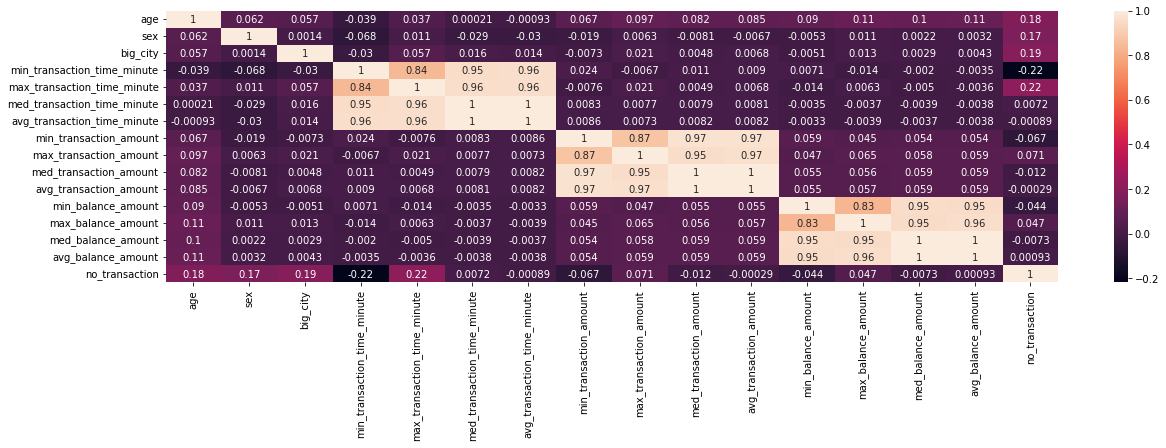

In [244]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr, annot=True, ax=ax)

In [245]:
# distribution

In [246]:
feature_cat = ['sex','big_city']
feature_num = ['age','min_transaction_time_minute','max_transaction_time_minute' ,'med_transaction_time_minute','avg_transaction_time_minute',
               'min_transaction_amount','max_transaction_amount','med_transaction_amount','avg_transaction_amount',
               'min_balance_amount','max_balance_amount','med_balance_amount','avg_balance_amount',
               'no_transaction']

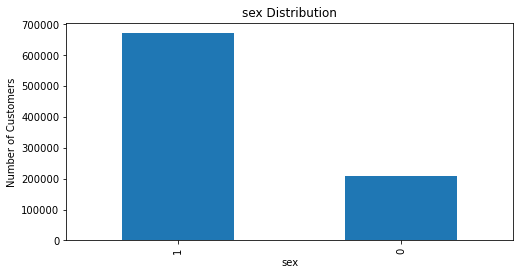

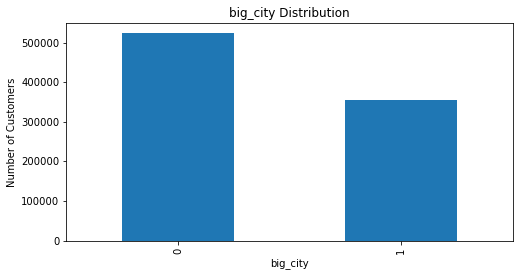

In [247]:
for col in feature_cat:
    df[col].value_counts().plot(kind='bar', figsize=(8, 4))
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()

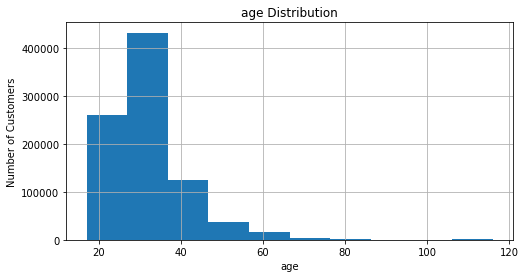

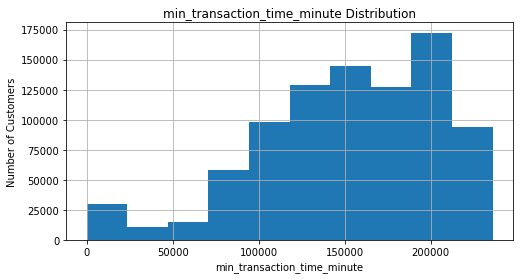

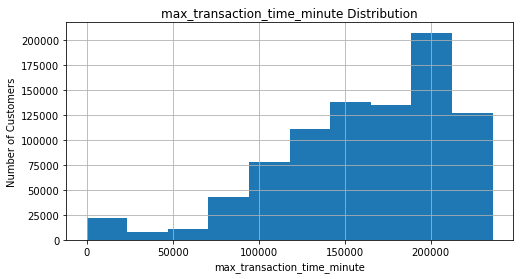

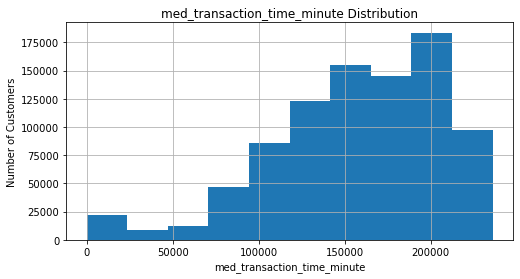

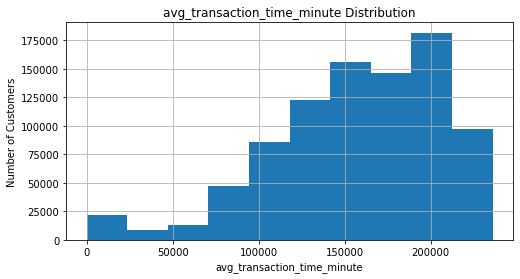

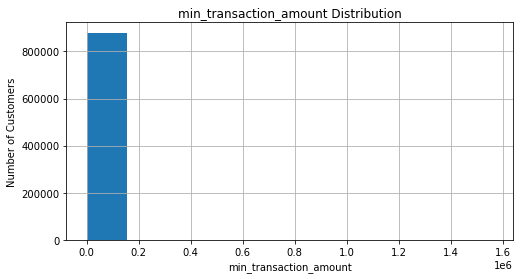

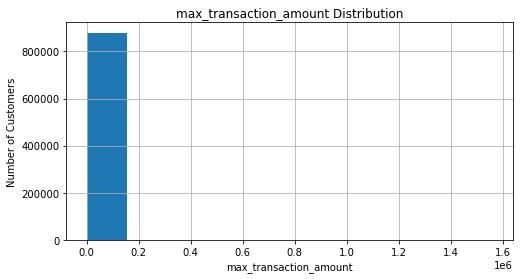

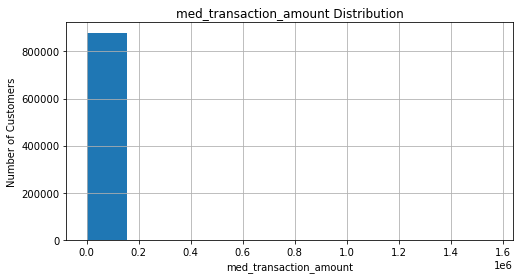

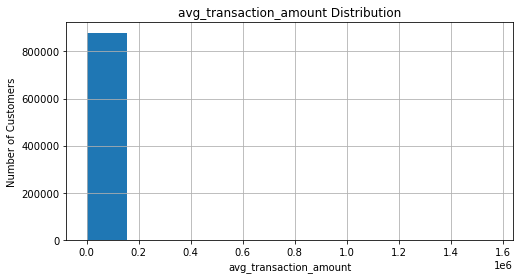

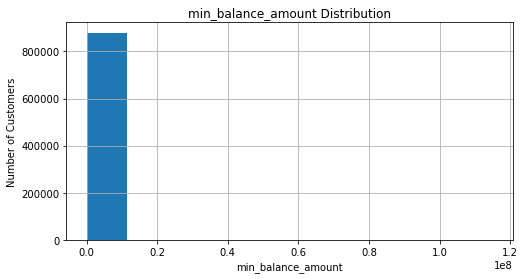

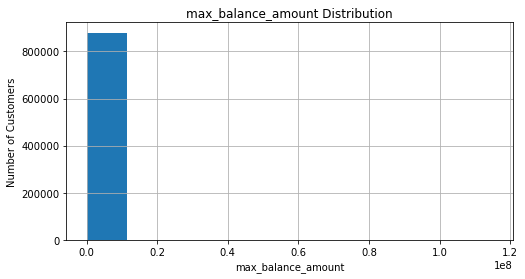

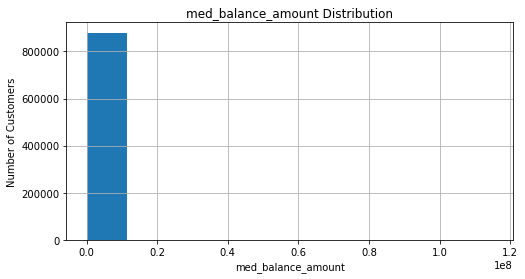

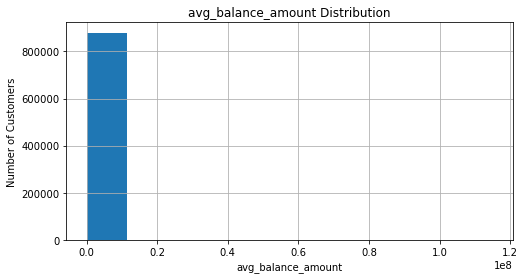

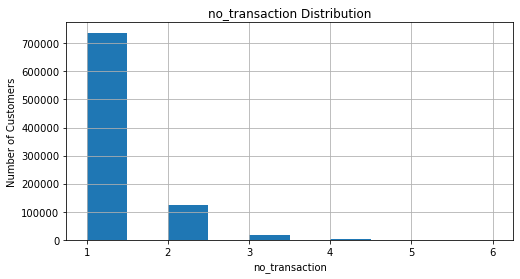

In [248]:
for col in feature_num:
    df[col].hist(figsize=(8, 4))
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()

In [249]:
# Distrubution of mean, max, med, and avg are the same; that means we can use only one of them in the model.
# https://stats.stackexchange.com/questions/68291/is-it-ok-to-use-correlated-variables-for-cluster-analysis

In [250]:
col = ['age', 'sex', 'big_city', 'med_transaction_time_minute',
       'med_transaction_amount', 'med_balance_amount', 'no_transaction']

In [251]:
df = df[col]

In [252]:
df.columns

Index(['age', 'sex', 'big_city', 'med_transaction_time_minute',
       'med_transaction_amount', 'med_balance_amount', 'no_transaction'],
      dtype='object')

# 5. Model

In [253]:
# normalized

In [254]:
scaler = MinMaxScaler()

In [255]:
df_scaled = scaler.fit_transform(df)

In [256]:
# kmean

In [257]:
sse = []

In [258]:
list_k = list(range(1, 11))

In [259]:
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)

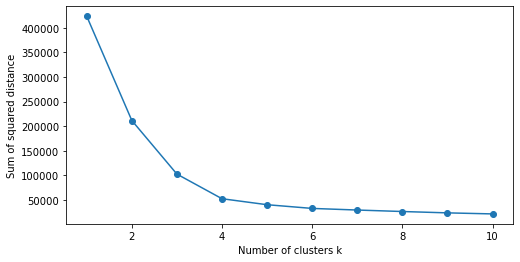

In [260]:
plt.figure(figsize=(8, 4))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.show()

In [261]:
# choose K = 4

In [262]:
km_4 = KMeans(n_clusters=4)

In [263]:
km_4.fit(df_scaled)

KMeans(n_clusters=4)

In [264]:
# predict

In [265]:
df['segment'] = km_4.predict(df_scaled)

C:\Users\peerapat\AppData\Local\Temp/ipykernel_12464/39678138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segment'] = km_4.predict(df_scaled)


In [266]:
df.head()

,age,sex,big_city,med_transaction_time_minute,med_transaction_amount,med_balance_amount,no_transaction,segment
0,22.0,0,0,143207.0,25.0,17819.050,1,1
1,59.0,1,0,141858.0,27999.0,2270.690,1,2
2,20.0,0,1,142712.0,459.0,17874.440,1,3
3,43.0,1,1,168431.0,1469.2,434849.495,2,0
4,28.0,0,0,181156.0,1762.5,6714.430,1,1


# 6. Result

In [267]:
# mean of attributes

In [268]:
df.groupby('segment').mean()

,age,sex,big_city,med_transaction_time_minute,med_transaction_amount,med_balance_amount,no_transaction
segment,,,,,,,
0,32.932420,1.0,1.0,157523.826174,1555.939832,117688.408131,1.354916
1,30.653708,0.0,0.0,159510.867392,1611.021253,109767.188860,1.027040
2,31.672511,1.0,0.0,155699.101728,1497.274244,111748.370895,1.139888
3,31.127935,0.0,1.0,160198.550874,1689.959534,110314.760851,1.077138


In [269]:
df.groupby('segment').count()

,age,sex,big_city,med_transaction_time_minute,med_transaction_amount,med_balance_amount,no_transaction
segment,,,,,,,
0,272157,272157,272157,272157,272157,272157,272157
1,124076,124076,124076,124076,124076,124076,124076
2,399055,399055,399055,399055,399055,399055,399055
3,84070,84070,84070,84070,84070,84070,84070


In [270]:
df.groupby('segment').mean().pivot_table(index=None, columns='segment')

segment,0,1,2,3
age,32.932420,30.653708,31.672511,31.127935
big_city,1.000000,0.000000,0.000000,1.000000
med_balance_amount,117688.408131,109767.188860,111748.370895,110314.760851
med_transaction_amount,1555.939832,1611.021253,1497.274244,1689.959534
med_transaction_time_minute,157523.826174,159510.867392,155699.101728,160198.550874
no_transaction,1.354916,1.027040,1.139888,1.077138
sex,1.000000,0.000000,1.000000,0.000000


# 7. PCA

In [271]:
X = df.drop(columns=["segment"])

In [272]:
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X)

In [273]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [274]:
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

C:\Users\peerapat\AppData\Local\Temp/ipykernel_12464/1455386738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PCA1"] = X_pca[:, 0]
C:\Users\peerapat\AppData\Local\Temp/ipykernel_12464/1455386738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PCA2"] = X_pca[:, 1]


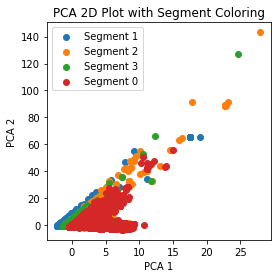

In [277]:
fig, ax = plt.subplots(figsize=(4, 4))

for segment in df["segment"].unique():
    segment_data = df[df["segment"] == segment]
    ax.scatter(segment_data["PCA1"], segment_data["PCA2"], label=f"Segment {segment}")

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_title("PCA 2D Plot with Segment Coloring")
ax.legend()
plt.show()